In [ ]:
import pandas as pd
from numpy.linalg import solve
import numpy as np

df = pd.read_csv('/content/current.csv')

In [ ]:
##cleaning the dataset
df_cleaned = df.drop(index=0)
df_cleaned.reset_index(drop=True, inplace=True)
df_cleaned['sasdate'] = pd.to_datetime(df_cleaned['sasdate'], format='%m/%d/%Y')
df_cleaned

,sasdate,RPI,W875RX1,DPCERA3M086SBEA,CMRMTSPLx,RETAILx,INDPRO,IPFPNSS,IPFINAL,IPCONGD,...,DNDGRG3M086SBEA,DSERRG3M086SBEA,CES0600000008,CES2000000008,CES3000000008,UMCSENTx,DTCOLNVHFNM,DTCTHFNM,INVEST,VIXCLSx
0,1959-01-01,2583.560,2426.0,15.188,2.766768e+05,18235.77392,21.9665,23.3891,22.2688,31.7011,...,18.294,10.152,2.13,2.45,2.04,NaN,6476.00,12298.00,84.2043,NaN
1,1959-02-01,2593.596,2434.8,15.346,2.787140e+05,18369.56308,22.3966,23.7048,22.4617,31.9337,...,18.302,10.167,2.14,2.46,2.05,NaN,6476.00,12298.00,83.5280,NaN
2,1959-03-01,2610.396,2452.7,15.491,2.777753e+05,18523.05762,22.7193,23.8483,22.5719,31.9337,...,18.289,10.185,2.15,2.45,2.07,NaN,6508.00,12349.00,81.6405,NaN
3,1959-04-01,2627.446,2470.0,15.435,2.833627e+05,18534.46600,23.2032,24.1927,22.9026,32.4374,...,18.300,10.221,2.16,2.47,2.08,NaN,6620.00,12484.00,81.8099,NaN
4,1959-05-01,2642.720,2486.4,15.622,2.853072e+05,18679.66354,23.5528,24.3936,23.1231,32.5925,...,18.280,10.238,2.17,2.48,2.08,95.3,6753.00,12646.00,80.7315,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
776,2023-09-01,19111.748,15741.9,116.594,1.507530e+06,705304.00000,103.2096,101.0935,101.3665,102.1034,...,120.395,123.976,29.90,34.55,26.62,67.9,508808.61,913938.95,5074.6108,15.0424
777,2023-10-01,19145.402,15784.6,116.663,1.505477e+06,703528.00000,102.3722,100.5292,100.5527,101.1664,...,120.040,124.228,29.97,34.67,26.65,63.8,513229.64,918210.64,5015.5456,19.0462
778,2023-11-01,19213.108,15859.9,117.127,1.514733e+06,703336.00000,102.6710,100.9362,101.2159,101.8557,...,119.325,124.551,30.26,34.96,26.89,61.3,517434.30,922552.40,4999.7208,13.8563
779,2023-12-01,19251.946,15899.0,117.773,1.530296e+06,706180.00000,102.6715,100.8332,101.2843,101.9884,...,119.193,124.917,30.45,35.01,27.14,69.7,522366.13,928336.14,5077.4222,12.6960


In [ ]:
##extract transformation code
transformation_codes = df.iloc[0, 1:].to_frame().reset_index()
transformation_codes.columns = ['Series', 'Transformation_Code']

# Function to apply transformations based on the transformation code
def apply_transformation(series, code):
    if code == 1:
        # No transformation
        return series
    elif code == 2:
        # First difference
        return series.diff()
    elif code == 3:
        # Second difference
        return series.diff().diff()
    elif code == 4:
        # Log
        return np.log(series)
    elif code == 5:
        # First difference of log
        return np.log(series).diff()
    elif code == 6:
        # Second difference of log
        return np.log(series).diff().diff()
    elif code == 7:
        # Delta (x_t/x_{t-1} - 1)
        return series.pct_change()
    else:
        raise ValueError("Invalid transformation code")



for series_name, code in transformation_codes.values:
    df_cleaned[series_name] = apply_transformation(df_cleaned[series_name].astype(float), float(code))

df_cleaned = df_cleaned[2:]
df_cleaned.reset_index(drop=True, inplace=True)
df_cleaned.head()



,sasdate,RPI,W875RX1,DPCERA3M086SBEA,CMRMTSPLx,RETAILx,INDPRO,IPFPNSS,IPFINAL,IPCONGD,...,DNDGRG3M086SBEA,DSERRG3M086SBEA,CES0600000008,CES2000000008,CES3000000008,UMCSENTx,DTCOLNVHFNM,DTCTHFNM,INVEST,VIXCLSx
0,1959-03-01,0.006457,0.007325,0.009404,-0.003374,0.008321,0.014306,0.006035,0.004894,0.000000,...,-0.001148,0.000292,-0.000022,-0.008147,0.004819,NaN,0.004929,0.004138,-0.014792,NaN
1,1959-04-01,0.006510,0.007029,-0.003622,0.019915,0.000616,0.021075,0.014338,0.014545,0.015650,...,0.001312,0.001760,-0.000022,0.012203,-0.004890,NaN,0.012134,0.006734,0.024929,NaN
2,1959-05-01,0.005796,0.006618,0.012043,0.006839,0.007803,0.014955,0.008270,0.009582,0.004770,...,-0.001695,-0.001867,-0.000021,-0.004090,-0.004819,NaN,0.002828,0.002020,-0.015342,NaN
3,1959-06-01,0.003068,0.003012,0.003642,-0.000097,0.009064,0.001141,0.007034,0.007128,-0.004767,...,0.003334,0.001946,-0.004619,0.003992,0.004796,NaN,0.009726,0.009007,-0.012252,NaN
4,1959-07-01,-0.000580,-0.000762,-0.003386,0.012155,-0.000330,-0.024240,0.001168,0.008249,0.013054,...,-0.001204,-0.000013,0.000000,-0.004040,-0.004796,NaN,-0.004631,-0.001000,0.029341,NaN


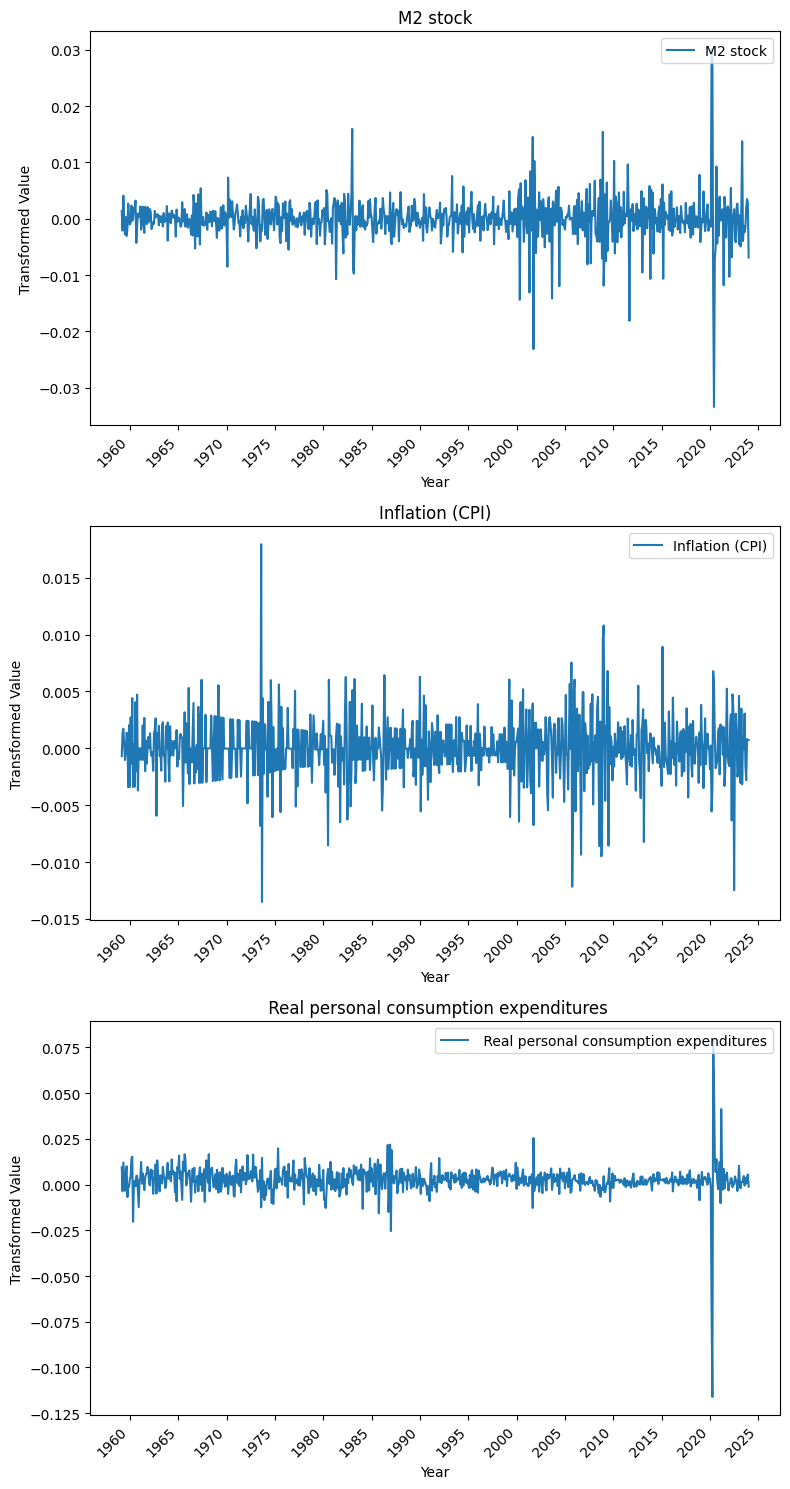

In [ ]:
#plot
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
series_to_plot = ['M2SL', 'CPIAUCSL', 'DPCERA3M086SBEA']
series_names = ['M2 stock',
                'Inflation (CPI)',
                ' Real personal consumption expenditures']
fig, axs = plt.subplots(len(series_to_plot), 1, figsize=(8, 15))
for ax, series_name, plot_title in zip(axs, series_to_plot, series_names):
    if series_name in df_cleaned.columns:
        dates = pd.to_datetime(df_cleaned['sasdate'], format='%m/%d/%Y')
        ax.plot(dates, df_cleaned[series_name], label=plot_title)
        ax.xaxis.set_major_locator(mdates.YearLocator(base=5))
        ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
        ax.set_title(plot_title)
        ax.set_xlabel('Year')
        ax.set_ylabel('Transformed Value')
        ax.legend(loc='upper right')
        plt.setp(ax.xaxis.get_majorticklabels(), rotation=45, ha='right')
    else:
        ax.set_visible(False)  # Hide plots for which the data is not available

plt.tight_layout()
plt.show()

In [ ]:
#matrix X and vector Y
Yraw = df_cleaned['CPIAUCSL']
Xraw = df_cleaned[['M2SL', 'DNDGRG3M086SBEA']]
num_lags = 8
num_leads = 4
X = pd.DataFrame()
col = 'CPIAUCSL'
for lag in range (0, num_lags+1):
        X[f'{col}_lag{lag}'] = Yraw.shift(lag)
for col in Xraw.columns:
    for lag in range (0, num_lags+1):
        X[f'{col}_lag{lag}'] = Xraw[col].shift(lag)
X.insert(0, 'Ones', np.ones(len(X)))
X

,Ones,CPIAUCSL_lag0,CPIAUCSL_lag1,CPIAUCSL_lag2,CPIAUCSL_lag3,CPIAUCSL_lag4,CPIAUCSL_lag5,CPIAUCSL_lag6,CPIAUCSL_lag7,CPIAUCSL_lag8,...,M2SL_lag8,DNDGRG3M086SBEA_lag0,DNDGRG3M086SBEA_lag1,DNDGRG3M086SBEA_lag2,DNDGRG3M086SBEA_lag3,DNDGRG3M086SBEA_lag4,DNDGRG3M086SBEA_lag5,DNDGRG3M086SBEA_lag6,DNDGRG3M086SBEA_lag7,DNDGRG3M086SBEA_lag8
0,1.0,-0.000690,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,-0.001148,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,0.001380,-0.000690,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.001312,-0.001148,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.0,0.001723,0.001380,-0.000690,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,-0.001695,0.001312,-0.001148,NaN,NaN,NaN,NaN,NaN,NaN
3,1.0,0.000339,0.001723,0.001380,-0.000690,NaN,NaN,NaN,NaN,NaN,...,NaN,0.003334,-0.001695,0.001312,-0.001148,NaN,NaN,NaN,NaN,NaN
4,1.0,-0.001034,0.000339,0.001723,0.001380,-0.000690,NaN,NaN,NaN,NaN,...,NaN,-0.001204,0.003334,-0.001695,0.001312,-0.001148,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
774,1.0,-0.001515,0.003051,-0.000047,0.001003,-0.003161,0.003480,-0.003052,-0.001322,0.004605,...,-0.004497,-0.010725,0.014038,-0.000887,0.004187,-0.007022,0.006627,-0.006705,-0.003289,0.013510
775,1.0,-0.002799,-0.001515,0.003051,-0.000047,0.001003,-0.003161,0.003480,-0.003052,-0.001322,...,0.000641,-0.006139,-0.010725,0.014038,-0.000887,0.004187,-0.007022,0.006627,-0.006705,-0.003289
776,1.0,0.000811,-0.002799,-0.001515,0.003051,-0.000047,0.001003,-0.003161,0.003480,-0.003052,...,-0.004907,-0.003021,-0.006139,-0.010725,0.014038,-0.000887,0.004187,-0.007022,0.006627,-0.006705
777,1.0,0.000726,0.000811,-0.002799,-0.001515,0.003051,-0.000047,0.001003,-0.003161,0.003480,...,0.002439,0.004867,-0.003021,-0.006139,-0.010725,0.014038,-0.000887,0.004187,-0.007022,0.006627


In [ ]:
y = Yraw.shift(-num_leads)
y

0     -0.001034
1     -0.000345
2      0.001367
3      0.001017
4     -0.003413
         ...   
774    0.000721
775         NaN
776         NaN
777         NaN
778         NaN
Name: CPIAUCSL, Length: 779, dtype: float64

In [ ]:
X_T = X.iloc[-1:].values
X_T

array([[ 1.00000000e+00,  7.21400503e-04,  7.26467817e-04,
         8.11330254e-04, -2.79891559e-03, -1.51527417e-03,
         3.05087605e-03, -4.70784880e-05,  1.00257828e-03,
        -3.16114422e-03, -6.86011934e-03,  2.77062956e-03,
         3.51058387e-03,  1.99477265e-03, -1.51356295e-03,
        -2.37724874e-03, -1.26831670e-03, -3.92912202e-03,
         1.37692721e-02, -2.65885649e-03,  4.86732286e-03,
        -3.02117448e-03, -6.13924919e-03, -1.07253383e-02,
         1.40383347e-02, -8.87353808e-04,  4.18730761e-03,
        -7.02247442e-03]])

In [ ]:
y = y.iloc[num_lags:-num_leads]
X = X.iloc[num_lags:-num_leads]
y



8     -0.001361
9      0.004411
10    -0.003395
11     0.000337
12    -0.003380
         ...   
770   -0.001515
771   -0.002799
772    0.000811
773    0.000726
774    0.000721
Name: CPIAUCSL, Length: 767, dtype: float64

In [ ]:
from numpy.linalg import solve
beta_ols = solve(X.T @ X, X.T @ y)
forecast = X_T@beta_ols*100
forecast



array([0.01295211])

In [ ]:
#real test
def calculate_forecast(df_cleaned,
                      p = 4,
                      H = [1,4,8],
                      end_date = '12/01/1999',
                      target = 'CPIAUCSL',
                      xvars = ['M2SL', 'DNDGRG3M086SBEA']):
 rt_df = df_cleaned[df_cleaned['sasdate'] <= pd.Timestamp(end_date)]
 Y_actual = []
 for h in H:
     os = pd.Timestamp(end_date) + pd.DateOffset(months=h)
     Y_actual.append(df_cleaned[df_cleaned['sasdate'] == os][target]*100)
 Yraw = rt_df[target]
 Xraw = rt_df[xvars]
 X = pd.DataFrame()
 for lag in range(0,p):
     X[f'{target}_lag{lag}'] = Yraw.shift(lag)
 for col in Xraw.columns:
     for lag in range(0,p):
         X[f'{col}_lag{lag}'] = Xraw[col].shift(lag)
 X.insert(0, 'Ones', np.ones(len(X)))
 X_T = X.iloc[-1:].values
 Yhat = []
 for h in H:
     y_h = Yraw.shift(-h)
     y = y_h.iloc[p:-h].values
     X_ = X.iloc[p:-h].values
     beta_ols = solve(X_.T @ X_, X_.T @ y)
     Yhat.append(X_T@beta_ols*100)
 return np.array(Y_actual) - np.array(Yhat)



In [ ]:
t0 = pd.Timestamp('12/1/1999')
e = []
T = []
for j in range(0, 10):
    t0 = t0 + pd.DateOffset(months=1)
    print(f'Using data up to {t0}')
    ehat = calculate_forecast(df_cleaned, p = 4, H = [1,4,8], end_date = t0)
    e.append(ehat.flatten())
    T.append(t0)

Using data up to 2000-01-01 00:00:00
Using data up to 2000-02-01 00:00:00
Using data up to 2000-03-01 00:00:00
Using data up to 2000-04-01 00:00:00
Using data up to 2000-05-01 00:00:00
Using data up to 2000-06-01 00:00:00
Using data up to 2000-07-01 00:00:00
Using data up to 2000-08-01 00:00:00
Using data up to 2000-09-01 00:00:00
Using data up to 2000-10-01 00:00:00


In [ ]:
edf = pd.DataFrame(e)
np.sqrt(edf.apply(np.square).mean())

0    0.282944
1    0.318535
2    0.301497
dtype: float64